<b>Анализ для крупного интернет-магазина. </b>

Задачи:

1. Обработать и подготовить данные.
2. Структурирование, коррекция и, если возможно, дополнения в данные.
3. Визуализация необходимых данных для выполнения задачи.
4. Приоритизация гипотиз.
5. Анализ A/B-теста.
6. Сделать выводы, удовлетворяющие условию задач.
7. Четкое следование поставленных в ТЗ задач.

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats as st
from datetime import datetime, timedelta

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option('display.max_colwidth', 0)

In [2]:
# Читаем .csv
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# Произведем общий анализ полученных данных на пропуски, дубликаты, типы данных и посмотрим как выглядят данные для 
# общего представления с чем имеем дело

# Изучим файл hypothesis.csv
display(hypothesis.head())
display(hypothesis.info())
display(hypothesis.isna().sum())
display(hypothesis.duplicated().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

0

Изменим названия столбцов в нижний регистр для удобства.

Опишем столбцы:

- Hypothesis — краткое описание гипотезы.

- Reach — охват пользователей по 10-балльной шкале.

- Impact — влияние на пользователей по 10-балльной шкале.

- Confidence — уверенность в гипотезе по 10-балльной шкале.

- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

In [4]:
# Приводим названия столбцов в нижний регистр
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
# Изучим файл orders.csv
display(orders.head())
display(orders.info())
display(orders.isna().sum())
display(orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

0

Столбец date не соответствует типу datetime.

Столбцы transactionId и visiorId не соответствуют snake_case.

Опишем столбцы:

- transactionId — идентификатор заказа.

- visitorId — идентификатор пользователя, совершившего заказ.

- date — дата, когда был совершён заказ.

- revenue — выручка заказа.

- group — группа A/B-теста, в которую попал заказ.

In [6]:
# Преобразуем тип данных date в datetime
orders['date'] = pd.to_datetime(orders['date'])

# Преобразуем столбцы в snake_case
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [7]:
# Изучим файл visitors.csv
display(visitors.head())
display(visitors.info())
display(visitors.isna().sum())
display(visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

date        0
group       0
visitors    0
dtype: int64

0

Столбец date не соответствует типу datetime.

Опишем столбцы:

- date — дата.

- group — группа A/B-теста.

- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [8]:
# Преобразуем тип данных date в datetime
visitors['date'] = pd.to_datetime(visitors['date'])

Вывод:

- Мы получили 3 .csv файла hypothesis.csv, orders.csv и visitors.csv 

- Сделали описание столбцов для удобности и информативности.

- Произвели поиск пропусков и явных дубликатов. Пропуски и явные дубликаты в данных отсутствуют.

- Привели названия некоторых столбцов в надлежащий для дальнейшей работы вид.

- Произвели форматирование типа данных столбцов date в datetime. 

- Произвели форматирование стиля написания столбцов в snake_case.

In [9]:
# Проверим посещения
print(visitors['visitors'].sum())
print('Посещения группы A', visitors.query('group == "A"')['visitors'].sum())
print('Посещения группы B -', visitors.query('group == "B"')['visitors'].sum())
print('В группе B посещений больше на', visitors.query('group == "B"')['visitors'].sum() - visitors.query('group == "A"')['visitors'].sum())

37652
Посещения группы A 18736
Посещения группы B - 18916
В группе B посещений больше на 180


In [10]:
# Проверим заказы
print(orders['transaction_id'].count())
print('Заказы группы A', orders.query('group == "A"')['transaction_id'].count())
print('Заказы группы B', orders.query('group == "B"')['transaction_id'].count())
print('В группе B заказов больше на', orders.query('group == "B"')['transaction_id'].count() - orders.query('group == "A"')['transaction_id'].count())

1197
Заказы группы A 557
Заказы группы B 640
В группе B заказов больше на 83


In [11]:
# Посмотрим не входили одни и те же пользователи в обе группы

visitors_a = orders[orders['group']=='A']['visitor_id']
visitors_b = orders[orders['group']=='B']['visitor_id']

visitors_ab = orders.loc[orders['visitor_id'].isin(visitors_a)& orders['visitor_id'].isin(visitors_b),'visitor_id'].unique()
print('Есть пользователи, которые входят в обе группы и их колличество', len(visitors_ab))

Есть пользователи, которые входят в обе группы и их колличество 58


В ходе проверки были обнаружены пользователи, которые вошли в обе группы. Следует их удалить.

Удалить получится только из заказов, т.к. информация о пользователях только в них, посещения модифицировать, увы, мы не сможем.

In [12]:
orders = orders.loc[~orders['visitor_id'].isin(visitors_ab)]

# Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

<b>Задача 1.
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.</b>

In [13]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [14]:
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Приоритетность гипотиз на основании фреймворка ICE
8 - 0 - 7 - 6 - 2 - 1 - 5 - 3 - 4

<b>Задача 2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.</b>

In [15]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [16]:
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Приоритетность гипотиз на основании фреймворка RICE (от большей к меньшей):

7 - 2 - 0 - 6 - 8 - 3 - 1 - 5 - 4

<b>Задача 3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.</b>

Приоритетность гипотиз (от большей к меньшей):

- RICE 7 - 2 - 0 - 6 - 8 - 3 - 1 - 5 - 4
-  ICE 8 - 0 - 7 - 6 - 2 - 1 - 5 - 3 - 4

Приоритизация гипотиз изменилась из-за того что в ICE не учитывается параметр reach (охват). Следовательно в RICE расчет ведется по иной формуле.

# Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

In [17]:
# Создадим датафрейм dates_groups содержащий уникальные пары значений orders['date'] to orders['group']
dates_groups = orders[['date','group']].drop_duplicates() 

# Объявим переменную orders_aggregated 
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [18]:
# Объявим переменную visitors_aggregated 
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max', 
'group' : 'max', 
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [19]:
# Определим переменную cumulative_data
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
# Присвоим столбцам удобные для использования названия
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [20]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


<b>Задача 1.
Проанализируйте A/B-тест:
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.</b>

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

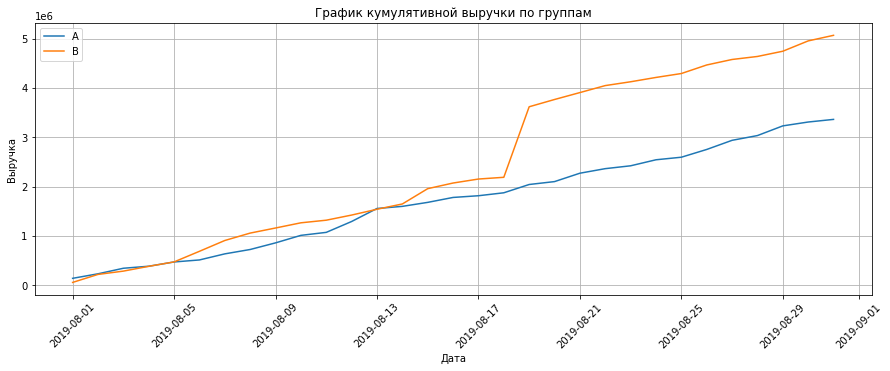

In [22]:
plt.figure(figsize=(15, 5))

# Строим график кумулятивной выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график кумулятивной выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation=45)
plt.legend();

В середине теста группа B прыгнула вверх (похоже на аномальные заказы) и лидировала основную часть теста. У группы A стабильный линейный рост. Причиной такого резкого роста мог стать аномально дорогой заказ.

In [23]:
orders.query('group == "B"')['revenue'].max()

1294500

<b>Задача 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.</b>

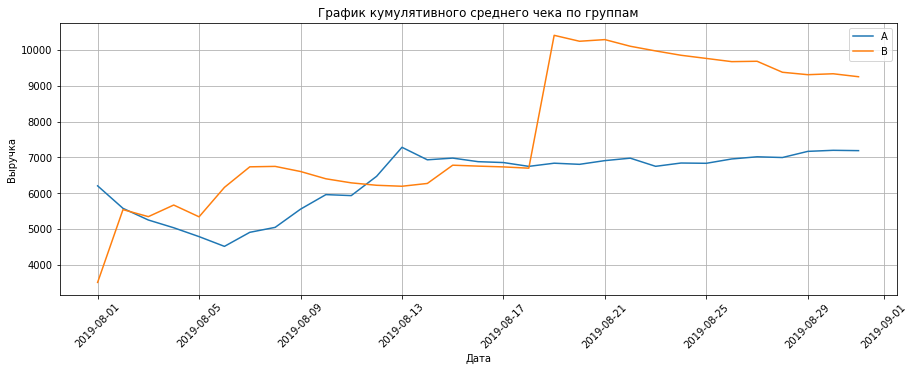

In [24]:
plt.figure(figsize=(15, 5))

# Строим график кумулятивного среднего чека группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')

# Строим график кумулятивного среднего чека группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation=45)
plt.legend();

Картина похожая, у группы B есть резкий скачок вверх, что свидетельствует что есть аномальные значения (очень дорогой заказ).

<b>Задача 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.</b>

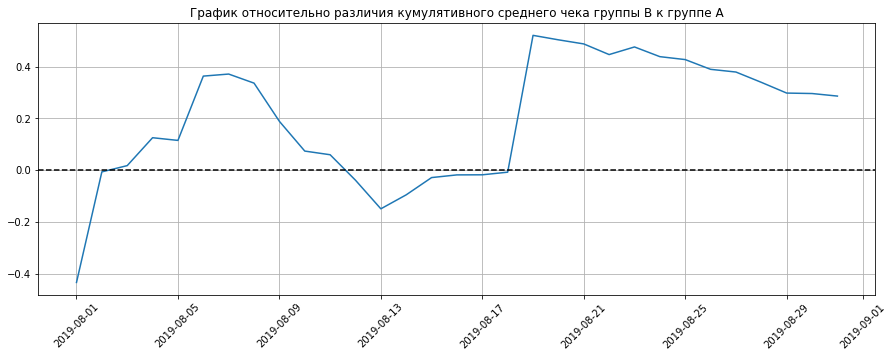

In [25]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(
    merged_cumulative_revenue['date'],
    (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
    (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)


plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')
plt.grid()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--');

В очередной раз убеждаемся что у B есть аномально крупные заказы. На графике виден изначальный рост B, однако вследствии была просадка и резкий перепад обратно вверх, благодаря возможному аномальному заказу.

<b>Задача 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.</b>

In [26]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

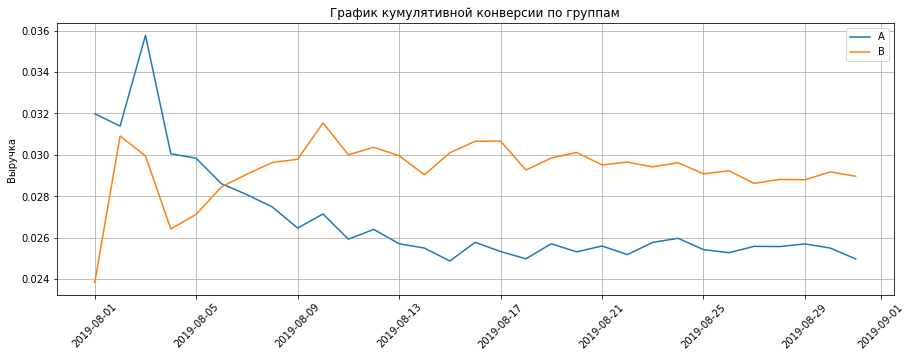

In [27]:
# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.grid()
plt.xticks(rotation=45)
plt.legend();

В начале теста конверсия была лучше у группы A в пике 0.037, однако через небольшой промежуток времени конверсия группы B успешно обогнала и была больше до самого конца, в то время как конверсия A резко упала до уровня 0.030 

<b>Задача 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.</b>

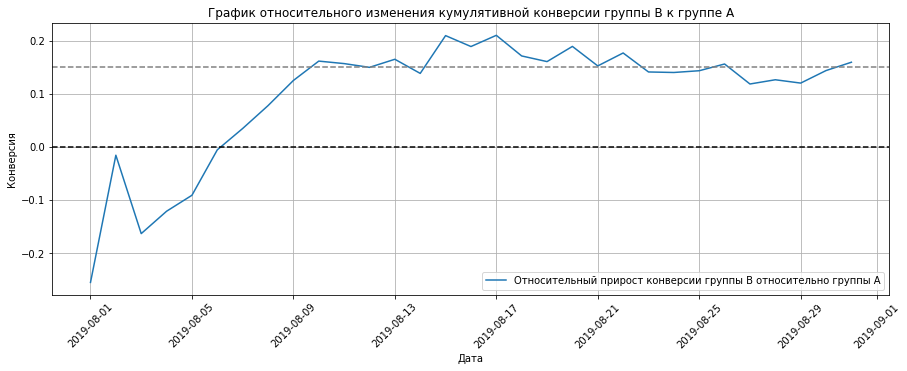

In [28]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(
    cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--');

Группа B отставала от A только в самом начале теста, в дальнейшем через небольшой промежуток времени обогнала группу A и зафиксировалась в диапазоне 10%-20%.

<b>Задача 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.</b>

In [29]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

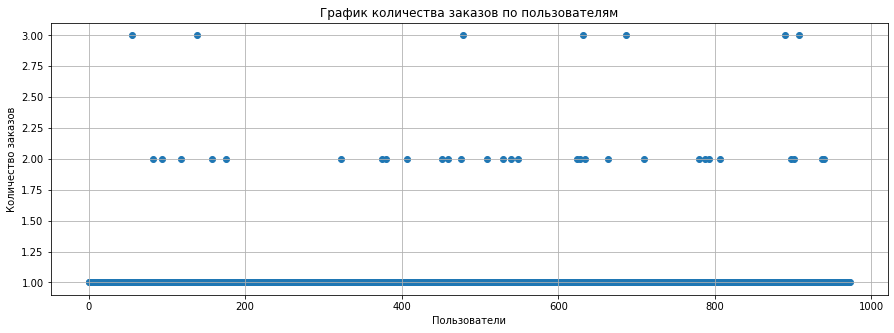

In [30]:
# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0, len(orders_by_users)))



plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders_by_users['transaction_id'])
plt.grid()
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Пользователи');

В основном все оформляют один заказ, реже 2, но есть пользователи которые оформили больше 10 заказов.

<b>Задача 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.</b>

In [31]:
display('95 перцентиль = %.2f' % (np.percentile(orders_by_users['transaction_id'], 95)))
display('99 перцентиль = %.2f' % (np.percentile(orders_by_users['transaction_id'], 99)))

'95 перцентиль = 1.00'

'99 перцентиль = 2.00'

Определим границу 99 перцентилем, все что больше - аномалии.

<b>Задача 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.</b>

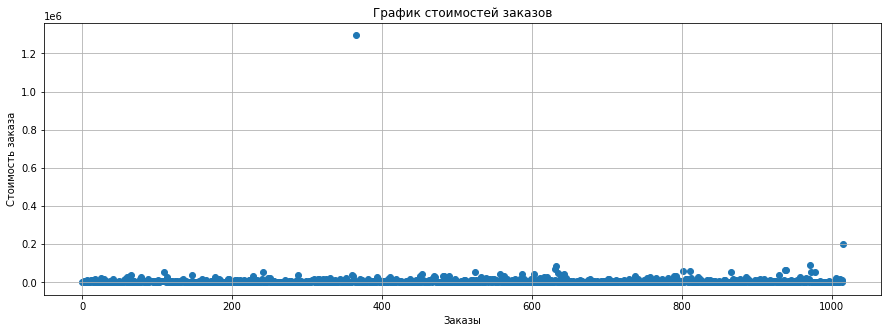

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders['revenue'])
plt.grid()
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Заказы');

На графике видим один нереально дорогой заказ, возможно он тянет группу B вверх.

<b>Задача 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.</b>

In [33]:
print('95 перцентиль = %.2f' % (np.percentile(orders['revenue'], 95)))
print('99 перцентиль = %.2f' % (np.percentile(orders['revenue'], 99)))

95 перцентиль = 26785.00
99 перцентиль = 53904.00


Определим границу 99 перцентилем, все что больше - аномалии.

Уберем аномальные выбросы из таблицы:

In [34]:
#orders_by_users_filtered = orders_by_users.query('transaction_id<= 4')
#orders_filtered = orders.query('revenue<= 58233')
#orders_filtered = orders_filtered.loc[orders_filtered['visitor_id'].isin(orders_by_users_filtered['visitor_id'])]

In [35]:
orders_per99 = np.percentile(orders_by_users['transaction_id'], 99)
revenue_per99 = np.percentile(orders['revenue'], 99)
                 
orders_by_users_filtered = orders_by_users.query('transaction_id<= @orders_per99')
orders_filtered = orders.query('revenue<= @revenue_per99')
orders_filtered = orders_filtered.loc[orders_filtered['visitor_id'].isin(orders_by_users_filtered['visitor_id'])]

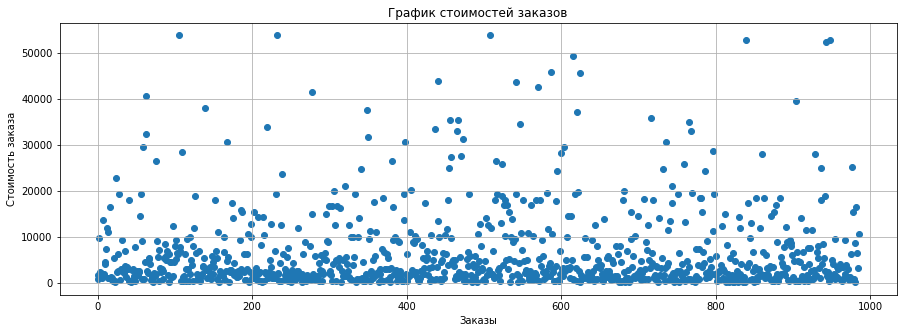

In [36]:
x_values = pd.Series(range(0,len(orders_filtered['revenue'])))

plt.figure(figsize=(15, 5))
plt.scatter(x_values, orders_filtered['revenue'])
plt.grid()
plt.title('График стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Заказы');

Без выбросов можно разглядеть стоимости основных заказов пользователей. В осонвном это заказы до 10000 у.е., но есть и более дорогие заказы, которые следует учитывать. Все таки эти суммы заказов далеки от топ заказа группы B в 1294500 у.е

In [37]:
# Посмотрим как поведет себя график кумулятивной выручки по группам без выбросов
orders_aggregated_clean = dates_groups.apply(
    lambda x: orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'], orders_filtered['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transaction_id' : pd.Series.nunique,
'visitor_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max', 
'group' : 'max', 
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulative_data_clean = orders_aggregated_clean.merge(visitors_aggregated, on=['date','group'])

cumulative_a_clean = cumulative_data_clean.loc[cumulative_data_clean['group'] == 'A',['date','revenue','transaction_id','visitors']]
cumulative_b_clean = cumulative_data_clean.loc[cumulative_data_clean['group'] == 'B',['date','revenue','transaction_id','visitors']]

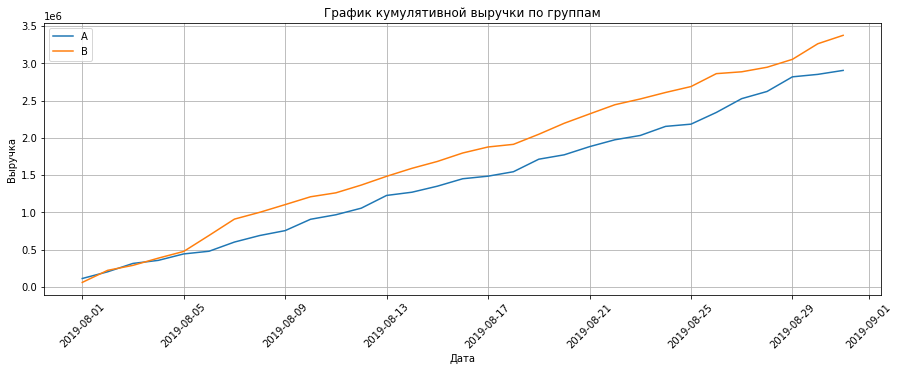

In [38]:
plt.figure(figsize=(15, 5))

# Строим график кумулятивной выручки группы А
plt.plot(cumulative_a_clean['date'], cumulative_a_clean['revenue'], label='A')

# Строим график кумулятивной выручки группы B
plt.plot(cumulative_b_clean['date'], cumulative_b_clean['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.grid()
plt.xticks(rotation=45)
plt.legend(); 

Убрав аномалии группа B стала более линейной на графике, без резких скачков, но это не повлияло на ее лидерство. 

Вывод:

Мы определили значения нормальности из сырого датафрейма и сделали новый с учетом фильтрации выбросов аномальных значений.

# RAW DATA статистическая значимость

В ходе исследования мы будем использовать непараметрический тест Уилкоксона-Манна-Уитни

<b>Задача 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.</b>

In [39]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders'] 

In [47]:
# Создаем выборки с сырыми данными
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(
    0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(
    0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

H0 - конверсия группы A равна конверсии группы В

H1 - конверсии групп не равны

alpha = 0.05

In [48]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sample_a, sample_b)[1]))
print('Средняя конверсия группы А: {:.1%}'.format(sample_a.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sample_b.mean()))

p_value: 0.01102
Средняя конверсия группы А: 2.5%
Средняя конверсия группы B: 2.9%


p_value < alpha, следовательно мы отвергаем H0. Разница конверсии ~12%. Стат значимое различие между группами есть.

<b>Задача 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.</b>

H0 - средний чек группы А равен чеку группы В

H1 - средний чек групп не равен

alpha = 0.05

In [42]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
))
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))

p_value: 0.82949
Средний чек группы А: 7189.44
Средний чек группы B: 9249.95


p_value > alpha, следовательно статистически значимых отличий в среднем чеке между группами нет.

# CLEAN DATA статистическая значимость

<b>Задача 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.</b>

In [43]:
orders_by_users_a_clean = (
    orders_filtered[orders_filtered['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a_clean.columns = ['user_id', 'orders']

orders_by_users_b_clean = (
    orders_filtered[orders_filtered['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b_clean.columns = ['user_id', 'orders'] 

In [44]:
sample_a_clean = pd.concat([orders_by_users_a_clean['orders'],pd.Series(
    0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_users_a_clean['orders'])), name='orders')],axis=0)

sample_b_clean = pd.concat([orders_by_users_b_clean['orders'],pd.Series(
    0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_users_b_clean['orders'])), name='orders')],axis=0)

H0 - конверсия группы равна конверсии группы В

H1 - конверсии групп не равны

alpha = 0.05

In [45]:
print('p_value: {:.5f}'.format(st.mannwhitneyu(sample_a_clean, sample_b_clean)[1]))
print('Средняя конверсия группы А после чистки: {:.1%}'.format(sample_a_clean.mean()))
print('Средняя конверсия группы B после чистки: {:.1%}'.format(sample_b_clean.mean()))

p_value: 0.00695
Средняя конверсия группы А после чистки: 2.4%
Средняя конверсия группы B после чистки: 2.8%


p_value < alpha, следовательно мы отвергаем H0.

После чистки уменьшилась конверсия, группа B по прежнему имеет конверсию выше. 

<b>Задача 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.</b>

H0 - средний чек группы А равен чеку группы В

H1 - средний чек групп не равен

alpha = 0.05

In [46]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders_filtered[orders_filtered['group']=='A']['revenue'], orders_filtered[orders_filtered['group']=='B']['revenue'])[1]
))
print('Средний чек группы А: {:.2f}'.format(orders_filtered[orders_filtered['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders_filtered[orders_filtered['group']=='B']['revenue'].mean()))

p_value: 0.78770
Средний чек группы А: 6487.02
Средний чек группы B: 6277.27


p_value > alpha, следовательно статистически значимых отличий в среднем чеке после чистки между группами нет. После чистки средний чек уменьшился у обоих групп. p_value увеличился.

<b>Задача 14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.</b>

Вывод:
 
Тест можно остановить, фиксируем победу группы B. 
 
В результате анализа была зафиксирована статистическая значимость в конверсии групп. Группа B лидировала над группой A.
 
Однако статистической значимости в среднем чеке двух групп выявлено не было.

Решение было принято исходя из того что:
- Больший размер куммулитивной выручки группы B, по сравнению с A.
- Конверсия группы B выше чем группы A.